# ASSIGNMENT: (to be deleted when done)

As mentioned earlier during class, now that you all have submitted your “semi-individual” assignments, it is time to get together in groups and figure out how to “trim down” the various exercises into something that you would like to submit as your portfolio for the oral exam.
 

During the exam, we will use the submission for additional questions. This means you have the opportunity to actively use your submission to influence the agenda for the exam.
 

We do not want you to simply take the 4 weekly assignments and concatenate them into a long notebook or multiple files in a folder/repository. What we want is for you to think about how you can make something creative and useful from the various things you have worked on, while you have been improving and learning. For instance, if you decide to submit a notebook with a regression supported by some good visualizations, that would be just fine. It’s not the quantity we are after.
The submission should hovewer have multiple notebooks for the different parts (please do not do superlong messy notebooks with endless outputs) and at least one Streamlit app (deployed! - and working) demonstrating the functionality. 
 

Also, the submissions are not graded directly.
 
 
Feel free to ask here if you have further questions.

# **M1 Exam Submission part 1**

## **Table of Contents**

#### I. Import Libraries and Data
#### II. Data Preparation
#### III. Descriptive Data Analysis 
#### IV. Exploritary Data Analysis (EDA)

## I: Import Libraries and Data


In [3]:
# install all requried libraries
!pip install -r https://raw.githubusercontent.com/JAdamHub/M1-Exam-Submission/refs/heads/main/requirements.txt?token=GHSAT0AAAAAACW5CC7AEACQJUGM4YNOK6XSZX5FAIQ

In [4]:
#import libraries
import pandas as pd             # for data manipulation
import numpy as np              # for mathematical operations
import matplotlib.pyplot as plt # for plotting
import seaborn as sns           # for data visualization
from scipy.stats import zscore  # for standardizing data & removing outliers
import geopandas as gpd # for   # !!! check usecase of geopandas...
import altair as alt            # for interactive visualization
from vega_datasets import data  # for data visualization

#additional libraries for importing data from github
import requests                 # used for importing data
import io                       # used for converting response content to a file-like object for pandas

# library used for gender mapping - section 4
import re

ModuleNotFoundError: No module named 'matplotlib'

In [10]:
# definition of url-paths for datasets
url1 = 'https://raw.githubusercontent.com/JAdamHub/M1-Exam-Submission/refs/heads/main/kiva_loans_part_0.csv?token=GHSAT0AAAAAACW5CC7BUKRXCRU7APTH5Q4EZX5FNYA'
url2 = 'https://raw.githubusercontent.com/JAdamHub/M1-Exam-Submission/refs/heads/main/kiva_loans_part_1.csv?token=GHSAT0AAAAAACW5CC7B5N3TSECZ4BHAIWIOZX5FN6A'
url3 = 'https://raw.githubusercontent.com/JAdamHub/M1-Exam-Submission/refs/heads/main/kiva_loans_part_2.csv?token=GHSAT0AAAAAACW5CC7AP4TAV3AH63VJT4RAZX5FN6Q'

# loading the urls into requests to download data
response1 = requests.get(url1)
response2 = requests.get(url2)
response3 = requests.get(url3)

# convert the response content to a file-like object for pandas using io.StringIO
# the advantage of StringIO is that it allows us to import the data without having to save it as a file for pandas
data_part1 = pd.read_csv(io.StringIO(response1.text))
data_part2 = pd.read_csv(io.StringIO(response2.text))
data_part3 = pd.read_csv(io.StringIO(response3.text))


NameError: name 'requests' is not defined

## II: Data Preparation

In [68]:
# We can see, that the imported loan dataset consists of 3 parts. We will like to combine these to one dataset
data = pd.concat([data_part1, data_part2, data_part3])

In [69]:
# Show the first rows
data.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [70]:
# Dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 671205 entries, 0 to 221204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-null  in

In [71]:
#Check to find columns with missing data
data.isna().sum()


id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                     4232
country_code               8
country                    0
region                 56800
currency                   0
partner_id             13507
posted_time                0
disbursed_time          2396
funded_time            48331
term_in_months             0
lender_count               0
tags                  171416
borrower_genders        4221
repayment_interval         0
date                       0
dtype: int64

In [77]:
# Convert to datetime
data['posted_time'] = pd.to_datetime(data['posted_time'], errors='coerce')
data['funded_time'] = pd.to_datetime(data['funded_time'], errors='coerce')
data['disbursed_time'] = pd.to_datetime(data['disbursed_time'], errors='coerce')


In [ ]:
# Check the initial state
print("Initial state:")
print("Missing values in funded_time:", data['funded_time'].isna().sum())
print("Missing values in disbursed_time:", data['disbursed_time'].isna().sum())
print("Data types:")
print(data[['funded_time', 'disbursed_time']].dtypes)
print("\nSample of initial data:")
print(data[['funded_time', 'disbursed_time']].head())

# Apply the changes
data['funded_time'] = data['funded_time'].where(data['funded_time'].notna(), None)
data['disbursed_time'] = data['disbursed_time'].where(data['disbursed_time'].notna(), None)

# Check the final state
print("\nAfter changes:")
print("Missing values in funded_time:", data['funded_time'].isna().sum())
print("Missing values in disbursed_time:", data['disbursed_time'].isna().sum())
print("Data types:")
print(data[['funded_time', 'disbursed_time']].dtypes)
print("\nSample of modified data:")
print(data[['funded_time', 'disbursed_time']].head())

Initial state:
Missing values in funded_time: 48331
Missing values in disbursed_time: 2396
Data types:
funded_time       datetime64[ns, UTC]
disbursed_time    datetime64[ns, UTC]
dtype: object

Sample of initial data:
                funded_time            disbursed_time
0 2014-01-02 10:06:32+00:00 2013-12-17 08:00:00+00:00
1 2014-01-02 09:17:23+00:00 2013-12-17 08:00:00+00:00
2 2014-01-01 16:01:36+00:00 2013-12-17 08:00:00+00:00
3 2014-01-01 13:00:00+00:00 2013-12-24 08:00:00+00:00
4 2014-01-01 19:18:51+00:00 2013-12-17 08:00:00+00:00

After changes:
Missing values in funded_time: 48331
Missing values in disbursed_time: 2396
Data types:
funded_time       datetime64[ns, UTC]
disbursed_time    datetime64[ns, UTC]
dtype: object

Sample of modified data:
                funded_time            disbursed_time
0 2014-01-02 10:06:32+00:00 2013-12-17 08:00:00+00:00
1 2014-01-02 09:17:23+00:00 2013-12-17 08:00:00+00:00
2 2014-01-01 16:01:36+00:00 2013-12-17 08:00:00+00:00
3 2014-01-01 13:00:00+

In [ ]:
# Check the initial state
print("Initial state:")
print("Missing values in funded_time:", data['funded_time'].isna().sum())
print("Missing values in disbursed_time:", data['disbursed_time'].isna().sum())
print("Data types:")
print(data[['funded_time', 'disbursed_time']].dtypes)
print("\nSample of initial data:")
print(data[['funded_time', 'disbursed_time']].head())

# Apply the changes
data['funded_time'] = data['funded_time'].where(data['funded_time'].notna(), None)
data['disbursed_time'] = data['disbursed_time'].where(data['disbursed_time'].notna(), None)

# Check the final state
print("\nAfter changes:")
print("Missing values in funded_time:", data['funded_time'].isna().sum())
print("Missing values in disbursed_time:", data['disbursed_time'].isna().sum())
print("Data types:")
print(data[['funded_time', 'disbursed_time']].dtypes)
print("\nSample of modified data:")
print(data[['funded_time', 'disbursed_time']].head())

Initial state:
Missing values in funded_time: 48331
Missing values in disbursed_time: 2396
Data types:
funded_time       datetime64[ns, UTC]
disbursed_time    datetime64[ns, UTC]
dtype: object

Sample of initial data:
                funded_time            disbursed_time
0 2014-01-02 10:06:32+00:00 2013-12-17 08:00:00+00:00
1 2014-01-02 09:17:23+00:00 2013-12-17 08:00:00+00:00
2 2014-01-01 16:01:36+00:00 2013-12-17 08:00:00+00:00
3 2014-01-01 13:00:00+00:00 2013-12-24 08:00:00+00:00
4 2014-01-01 19:18:51+00:00 2013-12-17 08:00:00+00:00

After changes:
Missing values in funded_time: 48331
Missing values in disbursed_time: 2396
Data types:
funded_time       datetime64[ns, UTC]
disbursed_time    datetime64[ns, UTC]
dtype: object

Sample of modified data:
                funded_time            disbursed_time
0 2014-01-02 10:06:32+00:00 2013-12-17 08:00:00+00:00
1 2014-01-02 09:17:23+00:00 2013-12-17 08:00:00+00:00
2 2014-01-01 16:01:36+00:00 2013-12-17 08:00:00+00:00
3 2014-01-01 13:00:00+

In [ ]:
# Check the initial state
print("Initial state:")
print("Missing values in funded_time:", data['funded_time'].isna().sum())
print("Missing values in disbursed_time:", data['disbursed_time'].isna().sum())
print("Data types:")
print(data[['funded_time', 'disbursed_time']].dtypes)
print("\nSample of initial data:")
print(data[['funded_time', 'disbursed_time']].head())

# Apply the changes
data['funded_time'] = data['funded_time'].where(data['funded_time'].notna(), None)
data['disbursed_time'] = data['disbursed_time'].where(data['disbursed_time'].notna(), None)

# Check the final state
print("\nAfter changes:")
print("Missing values in funded_time:", data['funded_time'].isna().sum())
print("Missing values in disbursed_time:", data['disbursed_time'].isna().sum())
print("Data types:")
print(data[['funded_time', 'disbursed_time']].dtypes)
print("\nSample of modified data:")
print(data[['funded_time', 'disbursed_time']].head())

Initial state:
Missing values in funded_time: 48331
Missing values in disbursed_time: 2396
Data types:
funded_time       datetime64[ns, UTC]
disbursed_time    datetime64[ns, UTC]
dtype: object

Sample of initial data:
                funded_time            disbursed_time
0 2014-01-02 10:06:32+00:00 2013-12-17 08:00:00+00:00
1 2014-01-02 09:17:23+00:00 2013-12-17 08:00:00+00:00
2 2014-01-01 16:01:36+00:00 2013-12-17 08:00:00+00:00
3 2014-01-01 13:00:00+00:00 2013-12-24 08:00:00+00:00
4 2014-01-01 19:18:51+00:00 2013-12-17 08:00:00+00:00

After changes:
Missing values in funded_time: 48331
Missing values in disbursed_time: 2396
Data types:
funded_time       datetime64[ns, UTC]
disbursed_time    datetime64[ns, UTC]
dtype: object

Sample of modified data:
                funded_time            disbursed_time
0 2014-01-02 10:06:32+00:00 2013-12-17 08:00:00+00:00
1 2014-01-02 09:17:23+00:00 2013-12-17 08:00:00+00:00
2 2014-01-01 16:01:36+00:00 2013-12-17 08:00:00+00:00
3 2014-01-01 13:00:00+

In [ ]:
# Check the initial state
print("Initial state:")
print("Missing values in funded_time:", data['funded_time'].isna().sum())
print("Missing values in disbursed_time:", data['disbursed_time'].isna().sum())
print("Data types:")
print(data[['funded_time', 'disbursed_time']].dtypes)
print("\nSample of initial data:")
print(data[['funded_time', 'disbursed_time']].head())

# Apply the changes
data['funded_time'] = data['funded_time'].where(data['funded_time'].notna(), None)
data['disbursed_time'] = data['disbursed_time'].where(data['disbursed_time'].notna(), None)

# Check the final state
print("\nAfter changes:")
print("Missing values in funded_time:", data['funded_time'].isna().sum())
print("Missing values in disbursed_time:", data['disbursed_time'].isna().sum())
print("Data types:")
print(data[['funded_time', 'disbursed_time']].dtypes)
print("\nSample of modified data:")
print(data[['funded_time', 'disbursed_time']].head())

Initial state:
Missing values in funded_time: 48331
Missing values in disbursed_time: 2396
Data types:
funded_time       datetime64[ns, UTC]
disbursed_time    datetime64[ns, UTC]
dtype: object

Sample of initial data:
                funded_time            disbursed_time
0 2014-01-02 10:06:32+00:00 2013-12-17 08:00:00+00:00
1 2014-01-02 09:17:23+00:00 2013-12-17 08:00:00+00:00
2 2014-01-01 16:01:36+00:00 2013-12-17 08:00:00+00:00
3 2014-01-01 13:00:00+00:00 2013-12-24 08:00:00+00:00
4 2014-01-01 19:18:51+00:00 2013-12-17 08:00:00+00:00

After changes:
Missing values in funded_time: 48331
Missing values in disbursed_time: 2396
Data types:
funded_time       datetime64[ns, UTC]
disbursed_time    datetime64[ns, UTC]
dtype: object

Sample of modified data:
                funded_time            disbursed_time
0 2014-01-02 10:06:32+00:00 2013-12-17 08:00:00+00:00
1 2014-01-02 09:17:23+00:00 2013-12-17 08:00:00+00:00
2 2014-01-01 16:01:36+00:00 2013-12-17 08:00:00+00:00
3 2014-01-01 13:00:00+

In [ ]:
# Check the initial state
print("Initial state:")
print("Missing values in funded_time:", data['funded_time'].isna().sum())
print("Missing values in disbursed_time:", data['disbursed_time'].isna().sum())
print("Data types:")
print(data[['funded_time', 'disbursed_time']].dtypes)
print("\nSample of initial data:")
print(data[['funded_time', 'disbursed_time']].head())

# Apply the changes
data['funded_time'] = data['funded_time'].where(data['funded_time'].notna(), None)
data['disbursed_time'] = data['disbursed_time'].where(data['disbursed_time'].notna(), None)

# Check the final state
print("\nAfter changes:")
print("Missing values in funded_time:", data['funded_time'].isna().sum())
print("Missing values in disbursed_time:", data['disbursed_time'].isna().sum())
print("Data types:")
print(data[['funded_time', 'disbursed_time']].dtypes)
print("\nSample of modified data:")
print(data[['funded_time', 'disbursed_time']].head())

Initial state:
Missing values in funded_time: 48331
Missing values in disbursed_time: 2396
Data types:
funded_time       datetime64[ns, UTC]
disbursed_time    datetime64[ns, UTC]
dtype: object

Sample of initial data:
                funded_time            disbursed_time
0 2014-01-02 10:06:32+00:00 2013-12-17 08:00:00+00:00
1 2014-01-02 09:17:23+00:00 2013-12-17 08:00:00+00:00
2 2014-01-01 16:01:36+00:00 2013-12-17 08:00:00+00:00
3 2014-01-01 13:00:00+00:00 2013-12-24 08:00:00+00:00
4 2014-01-01 19:18:51+00:00 2013-12-17 08:00:00+00:00

After changes:
Missing values in funded_time: 48331
Missing values in disbursed_time: 2396
Data types:
funded_time       datetime64[ns, UTC]
disbursed_time    datetime64[ns, UTC]
dtype: object

Sample of modified data:
                funded_time            disbursed_time
0 2014-01-02 10:06:32+00:00 2013-12-17 08:00:00+00:00
1 2014-01-02 09:17:23+00:00 2013-12-17 08:00:00+00:00
2 2014-01-01 16:01:36+00:00 2013-12-17 08:00:00+00:00
3 2014-01-01 13:00:00+

In [ ]:
# Check the initial state
print("Initial state:")
print("Missing values in funded_time:", data['funded_time'].isna().sum())
print("Missing values in disbursed_time:", data['disbursed_time'].isna().sum())
print("Data types:")
print(data[['funded_time', 'disbursed_time']].dtypes)
print("\nSample of initial data:")
print(data[['funded_time', 'disbursed_time']].head())

# Apply the changes
data['funded_time'] = data['funded_time'].where(data['funded_time'].notna(), None)
data['disbursed_time'] = data['disbursed_time'].where(data['disbursed_time'].notna(), None)

# Check the final state
print("\nAfter changes:")
print("Missing values in funded_time:", data['funded_time'].isna().sum())
print("Missing values in disbursed_time:", data['disbursed_time'].isna().sum())
print("Data types:")
print(data[['funded_time', 'disbursed_time']].dtypes)
print("\nSample of modified data:")
print(data[['funded_time', 'disbursed_time']].head())

Initial state:
Missing values in funded_time: 48331
Missing values in disbursed_time: 2396
Data types:
funded_time       datetime64[ns, UTC]
disbursed_time    datetime64[ns, UTC]
dtype: object

Sample of initial data:
                funded_time            disbursed_time
0 2014-01-02 10:06:32+00:00 2013-12-17 08:00:00+00:00
1 2014-01-02 09:17:23+00:00 2013-12-17 08:00:00+00:00
2 2014-01-01 16:01:36+00:00 2013-12-17 08:00:00+00:00
3 2014-01-01 13:00:00+00:00 2013-12-24 08:00:00+00:00
4 2014-01-01 19:18:51+00:00 2013-12-17 08:00:00+00:00

After changes:
Missing values in funded_time: 48331
Missing values in disbursed_time: 2396
Data types:
funded_time       datetime64[ns, UTC]
disbursed_time    datetime64[ns, UTC]
dtype: object

Sample of modified data:
                funded_time            disbursed_time
0 2014-01-02 10:06:32+00:00 2013-12-17 08:00:00+00:00
1 2014-01-02 09:17:23+00:00 2013-12-17 08:00:00+00:00
2 2014-01-01 16:01:36+00:00 2013-12-17 08:00:00+00:00
3 2014-01-01 13:00:00+

In [ ]:
# Check the initial state
print("Initial state:")
print("Missing values in funded_time:", data['funded_time'].isna().sum())
print("Missing values in disbursed_time:", data['disbursed_time'].isna().sum())
print("Data types:")
print(data[['funded_time', 'disbursed_time']].dtypes)
print("\nSample of initial data:")
print(data[['funded_time', 'disbursed_time']].head())

# Apply the changes
data['funded_time'] = data['funded_time'].where(data['funded_time'].notna(), None)
data['disbursed_time'] = data['disbursed_time'].where(data['disbursed_time'].notna(), None)

# Check the final state
print("\nAfter changes:")
print("Missing values in funded_time:", data['funded_time'].isna().sum())
print("Missing values in disbursed_time:", data['disbursed_time'].isna().sum())
print("Data types:")
print(data[['funded_time', 'disbursed_time']].dtypes)
print("\nSample of modified data:")
print(data[['funded_time', 'disbursed_time']].head())

Initial state:
Missing values in funded_time: 48331
Missing values in disbursed_time: 2396
Data types:
funded_time       datetime64[ns, UTC]
disbursed_time    datetime64[ns, UTC]
dtype: object

Sample of initial data:
                funded_time            disbursed_time
0 2014-01-02 10:06:32+00:00 2013-12-17 08:00:00+00:00
1 2014-01-02 09:17:23+00:00 2013-12-17 08:00:00+00:00
2 2014-01-01 16:01:36+00:00 2013-12-17 08:00:00+00:00
3 2014-01-01 13:00:00+00:00 2013-12-24 08:00:00+00:00
4 2014-01-01 19:18:51+00:00 2013-12-17 08:00:00+00:00

After changes:
Missing values in funded_time: 48331
Missing values in disbursed_time: 2396
Data types:
funded_time       datetime64[ns, UTC]
disbursed_time    datetime64[ns, UTC]
dtype: object

Sample of modified data:
                funded_time            disbursed_time
0 2014-01-02 10:06:32+00:00 2013-12-17 08:00:00+00:00
1 2014-01-02 09:17:23+00:00 2013-12-17 08:00:00+00:00
2 2014-01-01 16:01:36+00:00 2013-12-17 08:00:00+00:00
3 2014-01-01 13:00:00+

In [79]:
# Replace missing values with pd.NaT
data['funded_time'] = data['funded_time'].where(data['funded_time'].notna(), pd.NaT)
data['disbursed_time'] = data['disbursed_time'].where(data['disbursed_time'].notna(), pd.NaT)
data['posted_time'] = data['posted_time'].where(data['posted_time'].notna(), pd.NaT)

In [80]:
# Check the initial state
print("Initial state:")
print("Missing values in funded_time:", data['funded_time'].isna().sum())
print("Missing values in disbursed_time:", data['disbursed_time'].isna().sum())
print("Data types:")
print(data[['funded_time', 'disbursed_time']].dtypes)
print("\nSample of initial data:")
print(data[['funded_time', 'disbursed_time']].head())

# Apply the changes
data['funded_time'] = data['funded_time'].where(data['funded_time'].notna(), None)
data['disbursed_time'] = data['disbursed_time'].where(data['disbursed_time'].notna(), None)

# Check the final state
print("\nAfter changes:")
print("Missing values in funded_time:", data['funded_time'].isna().sum())
print("Missing values in disbursed_time:", data['disbursed_time'].isna().sum())
print("Data types:")
print(data[['funded_time', 'disbursed_time']].dtypes)
print("\nSample of modified data:")
print(data[['funded_time', 'disbursed_time']].head())

Initial state:
Missing values in funded_time: 48331
Missing values in disbursed_time: 2396
Data types:
funded_time       datetime64[ns, UTC]
disbursed_time    datetime64[ns, UTC]
dtype: object

Sample of initial data:
                funded_time            disbursed_time
0 2014-01-02 10:06:32+00:00 2013-12-17 08:00:00+00:00
1 2014-01-02 09:17:23+00:00 2013-12-17 08:00:00+00:00
2 2014-01-01 16:01:36+00:00 2013-12-17 08:00:00+00:00
3 2014-01-01 13:00:00+00:00 2013-12-24 08:00:00+00:00
4 2014-01-01 19:18:51+00:00 2013-12-17 08:00:00+00:00

After changes:
Missing values in funded_time: 48331
Missing values in disbursed_time: 2396
Data types:
funded_time       datetime64[ns, UTC]
disbursed_time    datetime64[ns, UTC]
dtype: object

Sample of modified data:
                funded_time            disbursed_time
0 2014-01-02 10:06:32+00:00 2013-12-17 08:00:00+00:00
1 2014-01-02 09:17:23+00:00 2013-12-17 08:00:00+00:00
2 2014-01-01 16:01:36+00:00 2013-12-17 08:00:00+00:00
3 2014-01-01 13:00:00+

In [73]:
data.isna().sum()

id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                     4232
country_code               8
country                    0
region                 56800
currency                   0
partner_id             13507
posted_time                0
disbursed_time          2396
funded_time            48331
term_in_months             0
lender_count               0
tags                  171416
borrower_genders        4221
repayment_interval         0
date                       0
dtype: int64

In [50]:
# Calculate Z-scores
z_scores = zscore(data['loan_amount'])

# Get boolean array indicating the presence of outliers
# Using 2 & -2 z_scores to get 95% of data within 2 standard deviations
data['outlier_loan_amount'] = (z_scores > 2) | (z_scores < -2)


#Removing outliers
data_clean = data[~data['outlier_loan_amount']]

# Check amount of outliers (if any?)
data['outlier_loan_amount'].sum()

np.int64(26177)

Text(0.5, 1.0, 'Box Plot of Passenger loan_amount')

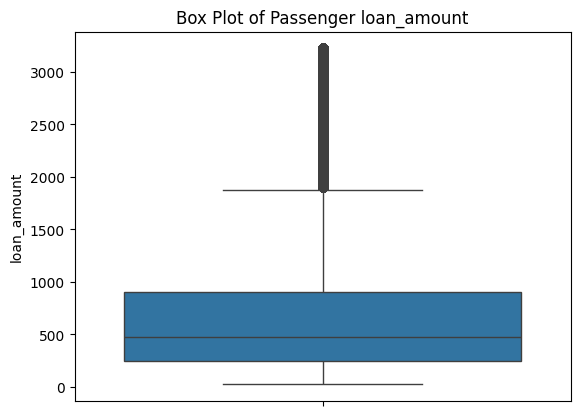

In [51]:
sns.boxplot(data=data_clean, y='loan_amount').set_title('Box Plot of Passenger loan_amount')

## III: Descriptive Statistics

/tmp/ipykernel_1291/3134581649.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_clean['funded_amount'], label='funded_amount', shade=True).set_title('funded_amount')


Text(0.5, 1.0, 'funded_amount')

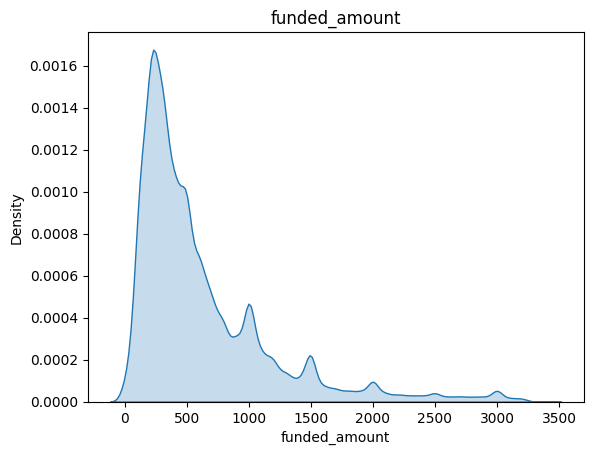

In [52]:
sns.kdeplot(data_clean['funded_amount'], label='funded_amount', shade=True).set_title('funded_amount')

In [53]:
data_clean[['loan_amount', 'funded_amount', 'term_in_months']].describe().T


,count,mean,std,min,25%,50%,75%,max
loan_amount,645028.0,663.452129,584.382610,25.0,250.0,475.0,900.0,3225.0
funded_amount,645028.0,624.770607,563.284765,0.0,250.0,450.0,800.0,3400.0
term_in_months,645028.0,13.662257,8.141323,1.0,8.0,13.0,14.0,141.0


In [54]:
# What is the total amount of loan_amount for each country?
country_loans = data_clean.groupby('country')['loan_amount'].sum()

# We would like a classic top 10 to get an overview of the
country_top_10 = country_loans.sort_values(ascending=False).head(10)

print(country_top_10)

country
Philippines    55082525.0
Kenya          32127000.0
El Salvador    26603650.0
Cambodia       19577500.0
Peru           18982900.0
Tajikistan     14698375.0
Uganda         14190050.0
Colombia       14012750.0
Pakistan       13034875.0
Ecuador        12899900.0
Name: loan_amount, dtype: float64


In [55]:
data_top_10 = data_clean[data_clean['country'].isin(country_top_10.index)]

data_top_10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 432035 entries, 0 to 221204
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   432035 non-null  int64  
 1   funded_amount        432035 non-null  float64
 2   loan_amount          432035 non-null  float64
 3   activity             432035 non-null  object 
 4   sector               432035 non-null  object 
 5   use                  429549 non-null  object 
 6   country_code         432035 non-null  object 
 7   country              432035 non-null  object 
 8   region               401704 non-null  object 
 9   currency             432035 non-null  object 
 10  partner_id           423663 non-null  float64
 11  posted_time          432035 non-null  object 
 12  disbursed_time       431654 non-null  object 
 13  funded_time          403976 non-null  object 
 14  term_in_months       432035 non-null  float64
 15  lender_count         4

/tmp/ipykernel_1291/1787005763.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_top_10.index, y=country_top_10.values, palette="viridis")


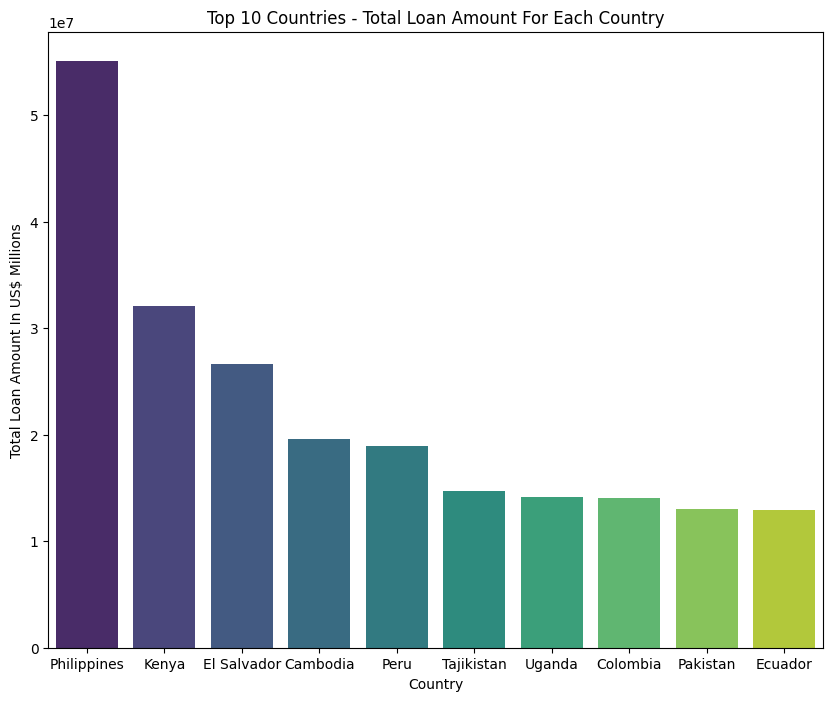

In [56]:
plt.figure(figsize=(10, 8))
sns.barplot(x=country_top_10.index, y=country_top_10.values, palette="viridis")
plt.title('Top 10 Countries - Total Loan Amount For Each Country')
plt.xlabel('Country')
plt.ylabel('Total Loan Amount In US$ Millions')  # managed to add labels (J)
plt.show()

In [57]:
correlation_data = data_top_10[['funded_amount', 'loan_amount', 'lender_count', 'term_in_months', 'partner_id']]

correlation_matrix = correlation_data.corr(method='spearman')

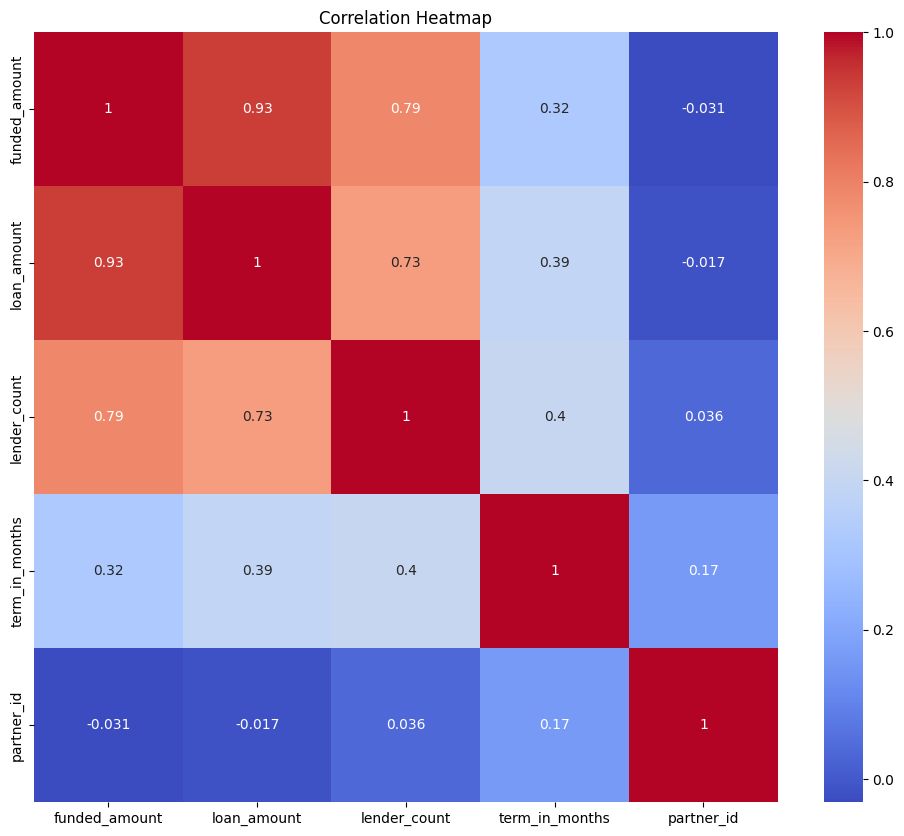

In [58]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Exploratory Data Analysis (EDA)

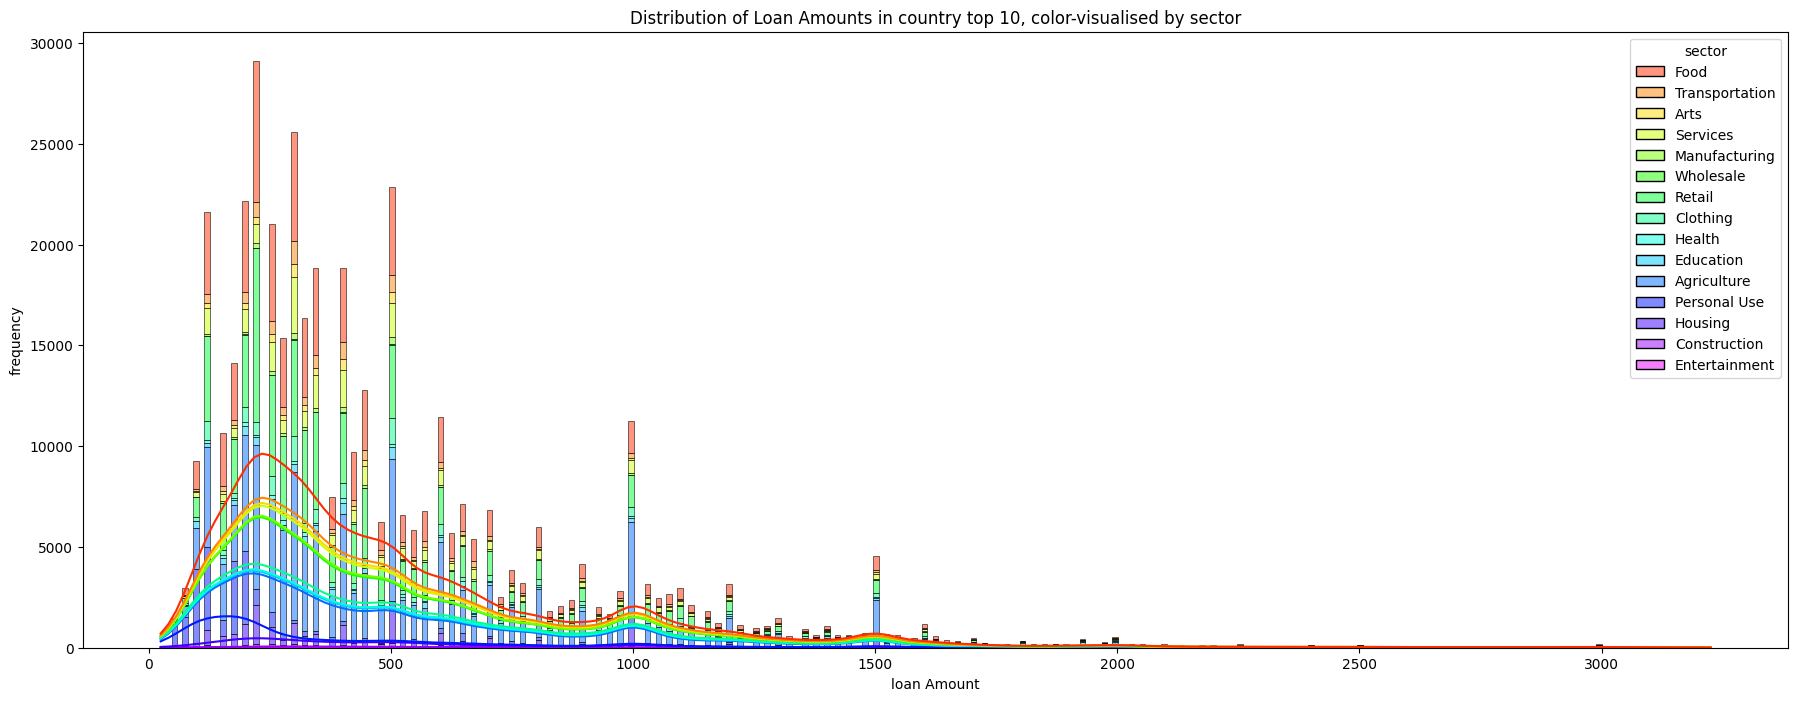

In [59]:
# Define of median and mean
mean_loan = data_top_10['loan_amount'].median()
median_loan = data_top_10['loan_amount'].mean()

# It's interesting to check the different sectors in top 10

plt.figure(figsize=(22, 8))
sns.histplot(data_top_10, x='loan_amount', hue='sector', multiple='stack', kde=True, palette='gist_rainbow')
plt.title('Distribution of Loan Amounts in country top 10, color-visualised by sector')
plt.xlabel('loan Amount')
plt.ylabel('frequency')
plt.show()

In [60]:
sector_stat = data_top_10.groupby('sector')['loan_amount'].describe().T
print(sector_stat)

sector    Agriculture         Arts      Clothing  Construction     Education  \
count   125316.000000  6704.000000  16437.000000   3388.000000  11890.000000   
mean       563.385761   492.817721    571.716250    590.385183    748.601766   
std        424.909904   406.222427    437.002221    425.661375    604.408927   
min         25.000000    50.000000     25.000000     50.000000     25.000000   
25%        250.000000   275.000000    250.000000    275.000000    300.000000   
50%        425.000000   400.000000    450.000000    500.000000    550.000000   
75%        750.000000   550.000000    775.000000    775.000000   1000.000000   
max       3225.000000  3225.000000   3225.000000   3225.000000   3225.000000   

sector  Entertainment          Food       Health       Housing  Manufacturing  \
count      395.000000  86933.000000  4531.000000  18038.000000    4210.000000   
mean       633.417722    482.568472   664.246303    522.998669     555.065321   
std        468.371832    392.712037 

/tmp/ipykernel_1291/3042502294.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_loans_by_country.index, y=average_loans_by_country.values, palette='viridis')


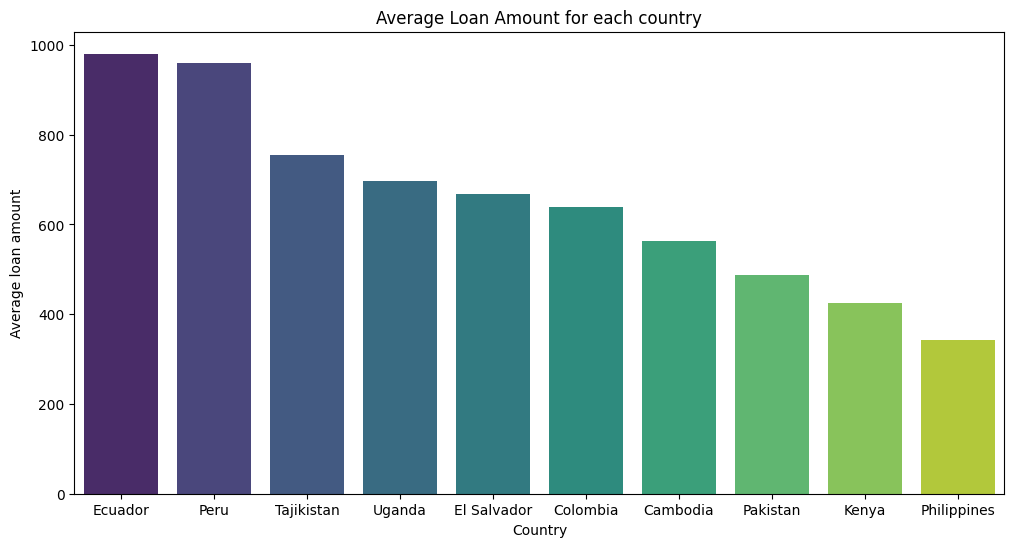

In [61]:
# Average loan amount for each top 10 country
average_loans_by_country = data_top_10.groupby('country')['loan_amount'].mean()

# Sort the countries (high to low)
average_loans_by_country = average_loans_by_country.sort_values(ascending=False)

# Lav et barplot
plt.figure(figsize=(12, 6))
sns.barplot(x=average_loans_by_country.index, y=average_loans_by_country.values, palette='viridis')
plt.title('Average Loan Amount for each country')
plt.xlabel('Country')
plt.ylabel('Average loan amount')
plt.show()

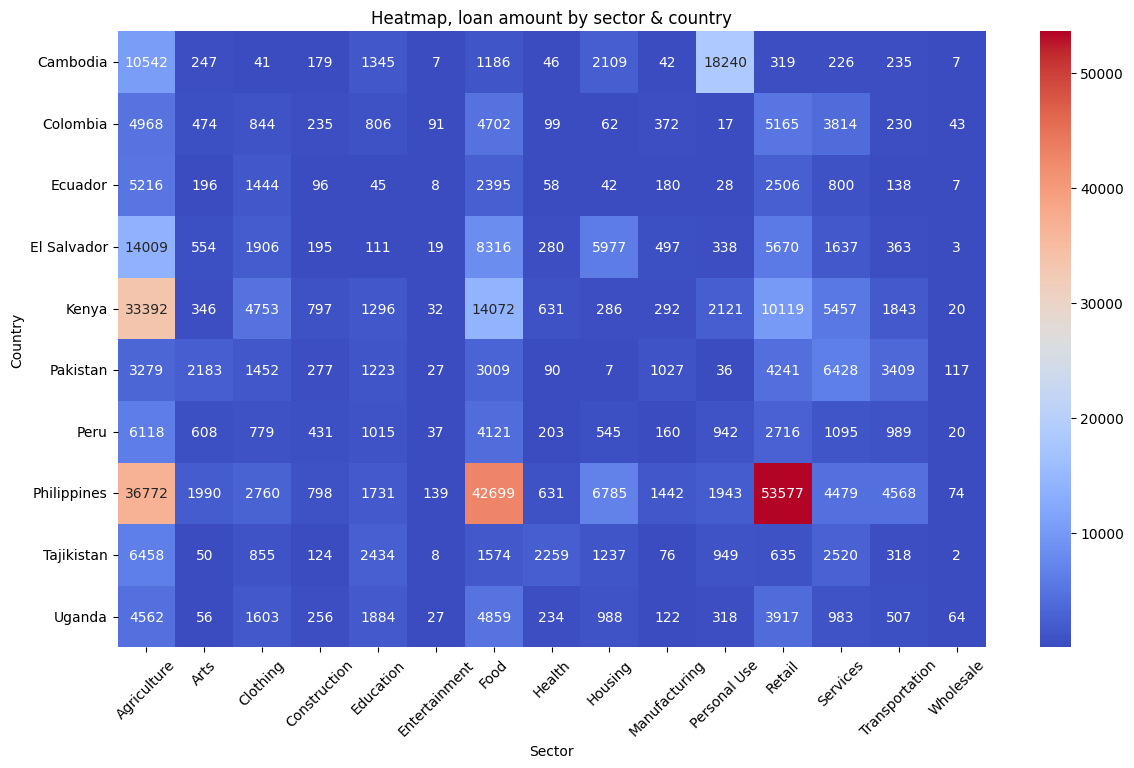

In [62]:
# Create a pivot table for the heatmap
outcome_heatmap_data = data_top_10.pivot_table(index='country', columns='sector', values='loan_amount', aggfunc='count', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(outcome_heatmap_data, annot=True, fmt="d", cmap="coolwarm")

# Set titles and labels
plt.title('Heatmap, loan amount by sector & country')
plt.xlabel('Sector')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_1291/2154698170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_top_10['funded_time'] = pd.to_datetime(data_top_10['funded_time'])
/tmp/ipykernel_1291/2154698170.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  funded_trend = data_top_10.resample('M').size()


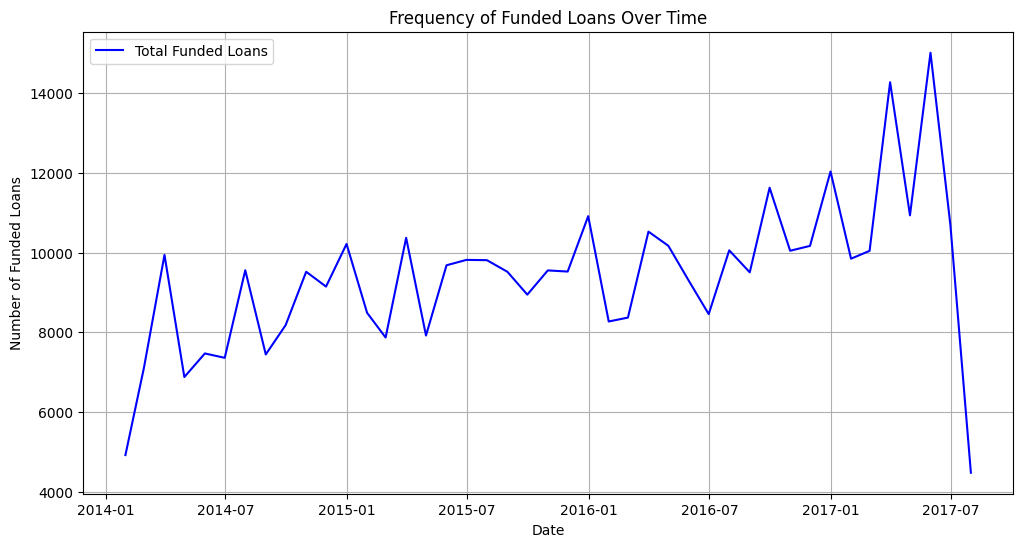

In [63]:
#use pandas to ensure that 'funded_time' is in a datetime format
data_top_10['funded_time'] = pd.to_datetime(data_top_10['funded_time'])

#set the date column as the index
data_top_10.set_index('funded_time', inplace=True)

#resample the data to a monthly frequency (can also be yearly, daily, etc.)
funded_trend = data_top_10.resample('M').size()

#plot the frequency of searches over time
plt.figure(figsize=(12, 6))
plt.plot(funded_trend, label='Total Funded Loans', color='blue')

#reset index to ensure "funded_time" returns back as a column in the dataframe
data_top_10.reset_index(inplace=True)

#add labels and title
plt.title('Frequency of Funded Loans Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Funded Loans')
plt.legend()
plt.grid(True)
plt.show()